In [1]:
import sys
sys.path.append("/home/huaqingj/MyResearch/TVDN")

In [2]:
from pyTVDN import TVDNDetect
from pathlib import Path
from scipy.io import loadmat
import numpy as np
%matplotlib inline

In [3]:
resDir = Path("../results")
dataDir = Path("../data")

In [4]:
filname = Path("subj2.mat")
MEG = loadmat(dataDir/filname)["DK_timecourse"]

## Construct the TVDN Detection Class


- `saveDir` is the path to save the results, if upspecified, the results will not be saved.

- You can also specify the detection parameters manunally

In [14]:
MEGdet = TVDNDetect(Ymat=MEG, saveDir="../results", dataType="MEG", fName="subj2", r=8, kappa=2.95, freq=60)

The parameters for detection are:
{'Lmin': 60,
 'MaxM': 19,
 'T': 2,
 'decimateRate': 10,
 'downRate': 20,
 'fName': 'subj2',
 'fct': 0.5,
 'freq': 60,
 'is_detrend': False,
 'kappa': 2.95,
 'lamb': 0.0001,
 'plotfct': 30,
 'r': 8}


## Run the Main Function

In [15]:
MEGdet()

## Tuning the kappa parameters

In [16]:
kappas = np.linspace(2.5, 3, 100)
MEGdet.TuningKappa(kappas)

### Then we  can check the best kappa parameters w.r.t mean square errors

In [17]:
print("The optimal kappas are:", MEGdet.optKappa)
print("The optimal number of change point under the range of kappa we speicified is:", MEGdet.optKappaOptNumChg)
print("The optimal number of change point is:", MEGdet.optNumChg)

The optimal kappas are: 2.808080808080808
The optimal number of change point under the range of kappa we speicified is: 13
The optimal number of change point is: 13


###  Update the estimated change point set based on optimal kappa

You can also specify the number of change points you want via provide the augment `numChg`, then the `UpdateEcpts` will update the current estimated change point set accordingly.

In such case, the `PlotXXX` function will plot the curves under the number of change point you provided

In [18]:
MEGdet.UpdateEcpts(numChg=12)
#MEGdet.UpdateEcpts()

### Plot the detection results under the optimal kappa

 You may also specify the `saveFigPath` to save the figure


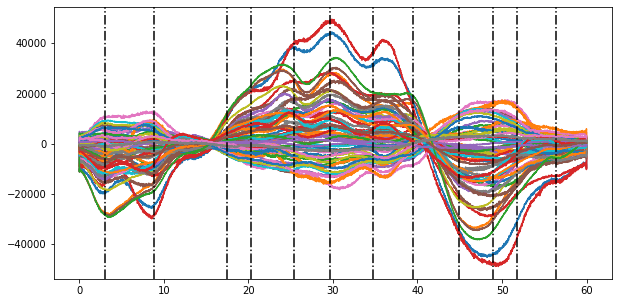

In [19]:
MEGdet.PlotEcpts(saveFigPath="detectionResults.jpg")

### Plot the reconstructed curve under the optimal kappa

 Similarly, you can specify the `saveFigPath` to save the figure
 
 You should specify the subsets of sequences you want to plot via `idxs` argument

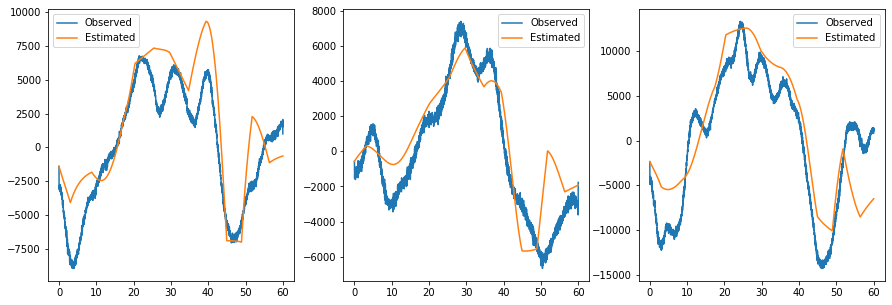

In [20]:
MEGdet.PlotRecCurve(idxs=[43, 45, 59], saveFigPath="recCurve.jpg")

### Plot the eigenvalue curve under the optimal kappa

 Similarly, you can specify the `saveFigPath` to save the figure

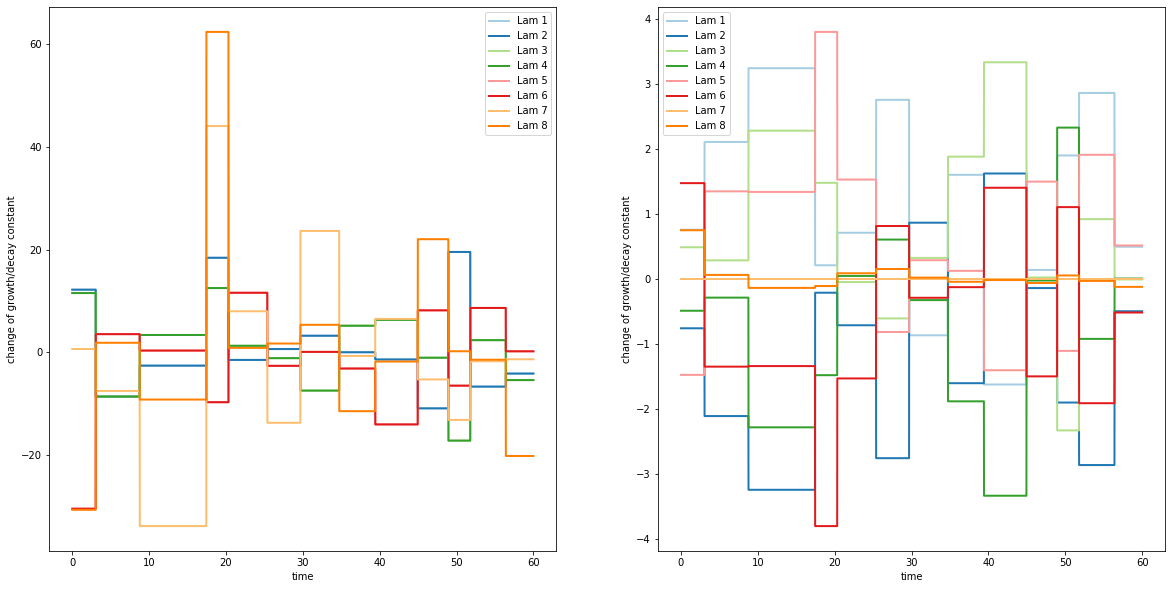

In [21]:
MEGdet.PlotEigenCurve()